In [1]:
import pickle
import torch
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.ticker as mticker
import numpy as np
from ecdf import draw_cdf_line

with open("./attn_scores.pkl", "rb") as file:
    attn_probs = pickle.load(file)

In [3]:
def get_prob_matrix(attn_probs, layer, head):
    probs_layer = attn_probs[layer]
    probs = probs_layer[0, head, :, :]
    return probs

In [3]:
probs = []
for layer in range(24):
    for head in range(4):
        pass

In [6]:
all_probs = [[] for _ in range(24)]
for layer in range(24):
    all_probs_per_layer = []
    for head in range(8, 12):
        p = get_prob_matrix(attn_probs, layer, head)
        for qid in range(2048):
            for kid in range(2048):
                all_probs_per_layer.append(p[qid][kid].item())
    all_probs[layer] = all_probs_per_layer
all_scores = [[] for _ in range(24)]
for layer in range(24):
    all_probs_per_layer = []
    for head in range(13, 16):
        p = get_prob_matrix(attn_probs, layer, head)
        for qid in range(2048):
            for kid in range(2048):
                all_probs_per_layer.append(p[qid][kid].item())
    all_scores[layer] = all_probs_per_layer

<Figure size 640x480 with 0 Axes>

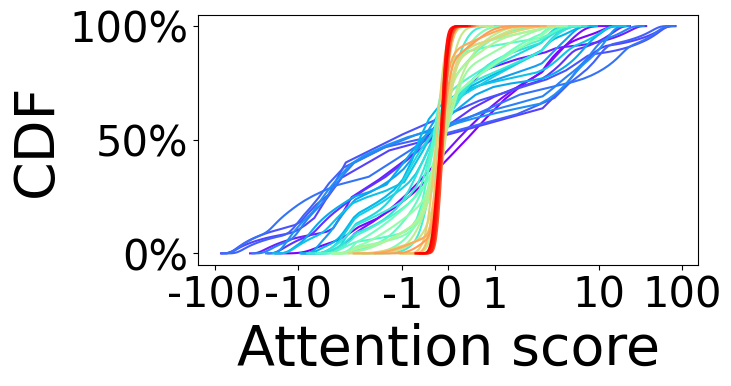

In [9]:
plt.clf()
parameters = {"xtick.labelsize": 30, "ytick.labelsize": 30}
plt.rcParams.update(parameters)
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.4, bottom=0.25, top=0.75)
colors = iter(cm.rainbow(np.linspace(0, 1, 48)))
for layer1, layer2 in zip(all_probs, all_scores):
    draw_cdf_line(plt, layer1, min(layer1), max(layer1), line_clr=next(colors))
    draw_cdf_line(plt, layer2, min(layer2), max(layer2), line_clr=next(colors))
# for layer in all_scores:
#     draw_cdf_line(plt, layer, min(layer), max(layer), line_clr=next(colors))
plt.xlabel("Attention score", fontsize=40)
plt.xscale("symlog")
def format_ticks(x, pos):
     return f"{int(x)}"
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(format_ticks)
plt.gca().xaxis.set_major_formatter(formatter)
def percent_ticks(x, pos):
     return f"{int(x*100)}%"
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_ticks))
# plt.xlim(-100, 100)
plt.ylabel("CDF", fontsize=40)
plt.savefig("cdf_attn_score_llama_2_13b.pdf")

<Figure size 640x480 with 0 Axes>

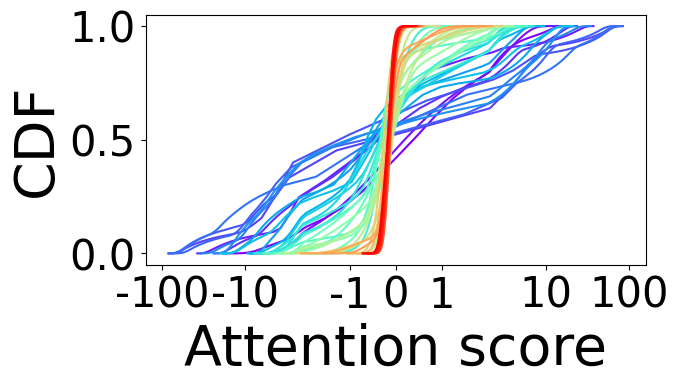

In [10]:
plt.clf()
parameters = {"xtick.labelsize": 30, "ytick.labelsize": 30}
plt.rcParams.update(parameters)
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.4, bottom=0.25, top=0.75)
colors = iter(cm.rainbow(np.linspace(0, 1, 48)))
for layer1, layer2 in zip(all_probs, all_scores):
    draw_cdf_line(plt, layer1, min(layer1), max(layer1), line_clr=next(colors))
    draw_cdf_line(plt, layer2, min(layer2), max(layer2), line_clr=next(colors))
# for layer in all_scores:
#     draw_cdf_line(plt, layer, min(layer), max(layer), line_clr=next(colors))
plt.xlabel("Attention score", fontsize=40)
plt.xscale("symlog")
def format_ticks(x, pos):
     return f"{int(x)}"
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(format_ticks)
plt.gca().xaxis.set_major_formatter(formatter)
# plt.xlim(-100, 100)
plt.ylabel("CDF", fontsize=40)
plt.savefig("cdf_attn_score_opt_13b.pdf")

In [7]:
def draw_prob_cdf(plt, attn_probs):
    plt.clf()
    parameters = {"xtick.labelsize": 30, "ytick.labelsize": 30}
    plt.rcParams.update(parameters)
    plt.figure(figsize=(10, 5))
    plt.subplots_adjust(left=0.4, bottom=0.2)
    colors = iter(cm.rainbow(np.linspace(0, 1, 24)))
    for layer in range(24):
        all_probs_per_layer = []
        for head in range(4):
            p = get_prob_matrix(attn_probs, layer, head)
            all_probs_per_layer.extend([x.item() for x in p.view(-1)])
        draw_cdf_line(plt, all_probs_per_layer, min(all_probs_per_layer), max(all_probs_per_layer), line_clr=next(colors))
    plt.xlabel("Attention probability", fontsize=40)
    plt.ylabel("CDF", fontsize=40)
    # plt.ylim(0, 1)
    # def to_percent(temp, position):
    #     return '%1.0f'%(100*temp) + '%'
    # plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))
    # plt.legend(loc="best", ncols=3, fontsize=16, framealpha=0.3)
    plt.show()

<Figure size 640x480 with 0 Axes>

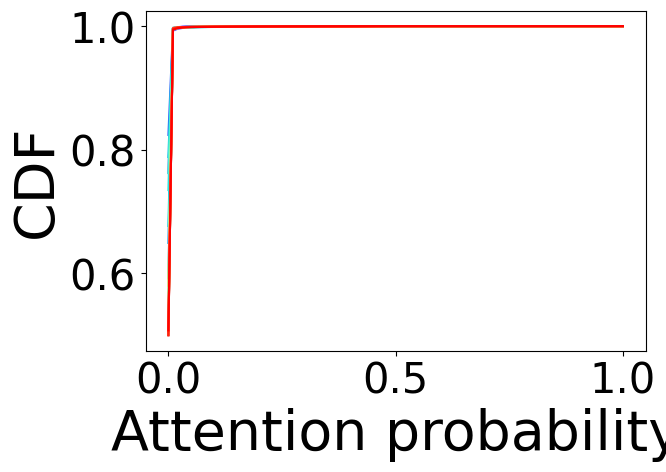

In [8]:
draw_prob_cdf(plt, attn_probs)